<a href="https://colab.research.google.com/github/Desmondonam/AWS-EC2-S3-and-DynamoDB-application/blob/main/Honda_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import os



In [ ]:
df = pd.read_csv('/content/honda_car_selling.csv')
df.head(10)

,Year,kms Driven,Fuel Type,Suspension,Price,Car Model
0,2019,19006 kms,Petrol,Automatic,9.29 Lakh,Honda City V CVT
1,2021,11936 kms,Petrol,Automatic,13.95 Lakh,Honda City ZX CVT
2,2018,29635 kms,Petrol,Automatic,9.95 Lakh,Honda City i-VTEC CVT ZX
3,2020,16163 kms,Petrol,Automatic,13.26 Lakh,Honda City ZX CVT
4,2015,105114 kms,Petrol,Manual,5.68 Lakh,Honda City i VTEC V
5,2015,101466 kms,Diesel,Manual,5.65 Lakh,Honda City i DTEC S
6,2016,52456 kms,Diesel,Manual,5.60 Lakh,Honda Jazz 1.5 SV i DTEC
7,2014,75247 kms,Diesel,Manual,6.50 Lakh,Honda City i DTEC VX
8,2017,88695 kms,Petrol,Manual,7.48 Lakh,Honda WR-V i-VTEC VX
9,2019,30906 kms,Petrol,Automatic,7.97 Lakh,Honda Amaze V CVT Petrol


In [ ]:
df.isnull().sum()

Year          0
kms Driven    0
Fuel Type     0
Suspension    0
Price         0
Car Model     0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        999 non-null    int64 
 1   kms Driven  999 non-null    object
 2   Fuel Type   999 non-null    object
 3   Suspension  999 non-null    object
 4   Price       999 non-null    object
 5   Car Model   999 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [ ]:
df.columns

Index(['Year', 'kms Driven', 'Fuel Type', 'Suspension', 'Price', 'Car Model'], dtype='object')

In [ ]:
df['kms Driven'] = [speed[0] for speed in df['kms Driven'].str.split()]
df['kms Driven'] = df['kms Driven'].astype('float')

In [ ]:
def Price_Converter(string):
    lis = string.split()
    res = [eval(i) for i in lis]
    return np.prod(res)
df.Price = df.Price.str.strip()
df.Price = df.Price.str.replace(',','')
df.Price = df.Price.str.replace('Lakh','100000')
df.Price = df.Price.map(Price_Converter)

In [ ]:
df.Year = pd.to_datetime(df.Year,format='%Y')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Year        999 non-null    datetime64[ns]
 1   kms Driven  999 non-null    float64       
 2   Fuel Type   999 non-null    object        
 3   Suspension  999 non-null    object        
 4   Price       999 non-null    float64       
 5   Car Model   999 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 47.0+ KB


In [ ]:
df['Car Model'].value_counts()

Honda City 1.5 S MT          47
Honda City i VTEC V          38
Honda Amaze S i-Dtech        35
Honda Brio S MT              33
Honda City V MT              26
                             ..
Honda Accord 2.4 M/T          1
Honda Amaze S CVT i-VTEC      1
Honda CR-V Diesel 2WD         1
Honda City Corporate Edit     1
Honda Civic 1.8 V AT Insp     1
Name: Car Model, Length: 183, dtype: int64

### Statistical Analysis

In [ ]:
df.head()

,Year,kms Driven,Fuel Type,Suspension,Price,Car Model
0,2019-01-01,19006.0,Petrol,Automatic,929000.0,Honda City V CVT
1,2021-01-01,11936.0,Petrol,Automatic,1395000.0,Honda City ZX CVT
2,2018-01-01,29635.0,Petrol,Automatic,995000.0,Honda City i-VTEC CVT ZX
3,2020-01-01,16163.0,Petrol,Automatic,1326000.0,Honda City ZX CVT
4,2015-01-01,105114.0,Petrol,Manual,568000.0,Honda City i VTEC V


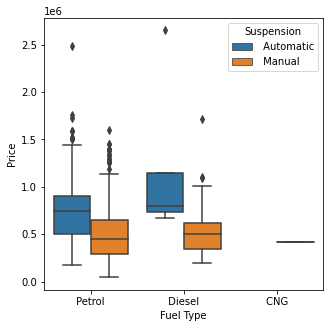

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
ax1 = sns.boxplot(y = df.Price, x= df['Fuel Type'],hue=df.Suspension)

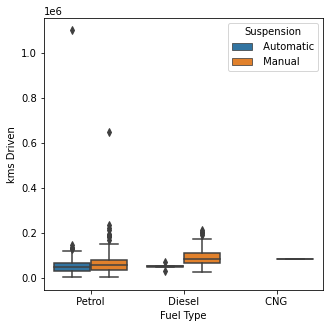

In [ ]:
plt.figure(figsize=(5,5))
ax1 = sns.boxplot(y = df['kms Driven'], x= df['Fuel Type'],hue=df.Suspension)

In [ ]:
# Removing outliers
df.drop(df.loc[df['kms Driven'] >= 2e6].index,axis=0,inplace=True)
df.drop(df.loc[df['kms Driven'] >= 0.6e6].index,axis=0,inplace=True)

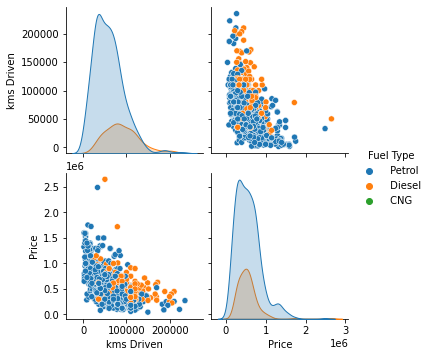

In [ ]:
sns.pairplot(df,hue='Fuel Type')

In [ ]:
df['Fuel Type'].unique()

array([' Petrol ', ' Diesel ', ' CNG '], dtype=object)

In [ ]:
df.drop(df.loc[df['Fuel Type'] == ' CNG '].index,inplace=True)

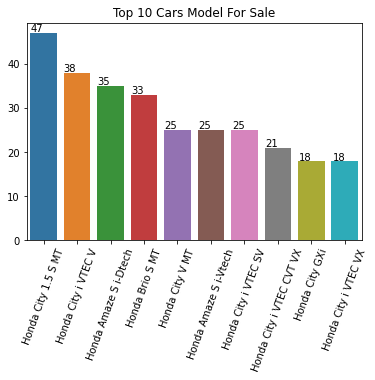

In [ ]:
Top_10_resale_cars = df['Car Model'].value_counts().head(10)
Top_10_resale_cars

ax = sns.barplot(x=Top_10_resale_cars.index,y=Top_10_resale_cars.values)
plt.xticks(rotation=70)
ax.set_title('Top 10 Car''s Model For Sale')
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.009))
plt.show()

In [ ]:
df.drop(columns='Car Model',inplace=True)
df.head()

,Year,kms Driven,Fuel Type,Suspension,Price
0,2019-01-01,19006.0,Petrol,Automatic,929000.0
1,2021-01-01,11936.0,Petrol,Automatic,1395000.0
2,2018-01-01,29635.0,Petrol,Automatic,995000.0
3,2020-01-01,16163.0,Petrol,Automatic,1326000.0
4,2015-01-01,105114.0,Petrol,Manual,568000.0


In [ ]:

df.columns


Index(['Year', 'kms Driven', 'Fuel Type', 'Suspension', 'Price'], dtype='object')

## Machine Learning Based on Predictive Model

In [ ]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['Fuel Type', 'Suspension']


In [ ]:
numerical_df = df.drop(columns=object_cols)
numerical_df.head()

,Year,kms Driven,Price
0,2019-01-01,19006.0,929000.0
1,2021-01-01,11936.0,1395000.0
2,2018-01-01,29635.0,995000.0
3,2020-01-01,16163.0,1326000.0
4,2015-01-01,105114.0,568000.0


In [ ]:
Categorical_df = df[object_cols]
Categorical_df.head()

,Fuel Type,Suspension
0,Petrol,Automatic
1,Petrol,Automatic
2,Petrol,Automatic
3,Petrol,Automatic
4,Petrol,Manual


In [ ]:
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_Cat = pd.DataFrame(OH_encoder.fit_transform(Categorical_df))
OH_cols_Cat.head()

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,0,1,2,3
0,0.0,1.0,1.0,0.0
1,0.0,1.0,1.0,0.0
2,0.0,1.0,1.0,0.0
3,0.0,1.0,1.0,0.0
4,0.0,1.0,0.0,1.0


In [ ]:
OH_cols_Cat.columns = ['Fuel Type Diesel','Fuel Type Petrol','Automatic Suspension','Manual Suspension']

In [ ]:
numerical_df.reset_index(inplace=True)

In [ ]:
Final_data = pd.concat([OH_cols_Cat,numerical_df],axis=1)
Final_data

,Fuel Type Diesel,Fuel Type Petrol,Automatic Suspension,Manual Suspension,index,Year,kms Driven,Price
0,0.0,1.0,1.0,0.0,0,2019-01-01,19006.0,929000.0
1,0.0,1.0,1.0,0.0,1,2021-01-01,11936.0,1395000.0
2,0.0,1.0,1.0,0.0,2,2018-01-01,29635.0,995000.0
3,0.0,1.0,1.0,0.0,3,2020-01-01,16163.0,1326000.0
4,0.0,1.0,0.0,1.0,4,2015-01-01,105114.0,568000.0
...,...,...,...,...,...,...,...,...
991,0.0,1.0,0.0,1.0,994,2007-01-01,90000.0,122000.0
992,0.0,1.0,0.0,1.0,995,2016-01-01,31500.0,425000.0
993,0.0,1.0,0.0,1.0,996,2017-01-01,39735.0,510000.0
994,0.0,1.0,0.0,1.0,997,2017-01-01,36000.0,610000.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
X = Final_data.drop(columns=['Price','Year'])
y = Final_data[['Price']]
[X_train, X_test, y_train, y_test]= train_test_split(X,y,test_size=0.2,random_state=1)
model = RandomForestRegressor(n_estimators=50, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mean_absolute_error(y_test, y_pred)

<ipython-input-29-46c318a4b435>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


188671.5